# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 4: Advanced Modelling

Author: Patrick Smith

Date: 09/04/2024

Contact: patrick.b.smith@gmail.com

## Description of Variables 

| Column                         | Descriptor                                                                 | Datatype |
|--------------------------------|----------------------------------------------------------------------------|----------|
| Year                           | The period in which the event occurred.                                    | int32    |
| Quarter                        | Quarter of the year (Q1=1, Q2=2, Q3=3, Q4=4).                              | object   |
| Nationality                    | Nationality of the individual.                                             | object   |
| Age                            | Age of the individual at the time of the event.                             | object   |
| Sex                            | Gender of the individual (male, female, other/unknown).                     | int32    |
| Return destination group       | Grouped destination country for return (Home country, EU, Other country).   | object   |
| Return destination             | Specific destination country for return.                                    | object   |
| Applicant type                 | Type of applicant (main applicant, dependant).                             | object   |
| Case outcome                   | Outcome of the case (granted, refused, withdrawn, resettlement).             | object   |
| Decisions                      | Number of decisions made.                                                   | float64  |
| Occupation                     | Occupation of the individual.                                              | object   |
| Industry                       | Industry sector for which the application to work was made.                 | object   |
| Occ. major group               | Major group classification of the occupation.                              | object   |
| Occ. sub-major group           | Sub-major group classification of the occupation.                          | object   |
| Occ. minor group               | Minor group classification of the occupation.                              | object   |
| Occ. unit group                | Unit group classification of the occupation.                               | object   |
| Sex_Male                       | Dummy variable for male (1 if male, 0 otherwise).                          | object   |
| Sex_Female                     | Dummy variable for female (1 if female, 0 otherwise).                      | object   |
| Sex_Other                      | Dummy variable for other or NA (1 if other/unknown, 0 otherwise).          | object   |
| General Region                 | Consolidated Region                                                        | object   |

## Table of Contents - Book 3

[Preprocessing: Case Outcome](#Case_Outcome) 

[Preprocessing: Visa Outcome](#Visa_Outcomes) 

[Preprocessing: Age](#Age) 

[Baseline Modelling](#B_Model)


## Data Loading

<div id='Load'></div>

In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
#see max columns
pd.options.display.max_columns = None

In [11]:
file_path = r'C:\Users\kamik\Downloads\df_model.csv'

df_model = pd.read_csv(file_path, low_memory=False)

## Next Objective

1) Pre-Processing
2) Focus on dependent variable, case outcome
3) Further improve data quality by imputation
4) Begin baseline modelling
5) Split the data into train and test sets
6) Try several different simplier models to get started
7) Plots and univariate and bivariate distribution
8) Initial insights and conclusions to shareholders

In [4]:
#Decision trees - finding question points towards impurities
#metrics eval - check agianst other models
#random forest after decision trees - ensamble learning


In [5]:
df_model.head()

,Year,Quarter,Nationality,Region,Age,Sex,Case outcome,Decisions,Occupation,Industry,General_Region
0,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,2652.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
1,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,809.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
2,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,15.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
3,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,88.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
4,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,609.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia


In [12]:
df_model.duplicated().sum()

384995

In [14]:
df_model = df_model.drop_duplicates()

print(f"We have {df_model.shape[0]} rows and {df_model.shape[1]} columns with string, floats and integers in our clean data.")

We have 916384 rows and 11 columns with string, floats and integers in our clean data.


In [15]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 916384 entries, 0 to 1301378
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            916384 non-null  int64  
 1   Quarter         916384 non-null  int64  
 2   Nationality     916384 non-null  object 
 3   Region          916384 non-null  object 
 4   Age             916384 non-null  object 
 5   Sex             916384 non-null  int64  
 6   Case outcome    916384 non-null  object 
 7   Decisions       916384 non-null  float64
 8   Occupation      916384 non-null  object 
 9   Industry        916384 non-null  object 
 10  General_Region  916384 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 83.9+ MB


Making a df without nationality and occupation in case we need to. Unnecesary clutter. 

In [17]:
df_reduced = df_model.drop(['Nationality', 'Occupation'], axis=1)

In [18]:
df_reduced.duplicated().sum()

566351

In [19]:
df_reduced = df_reduced.drop_duplicates()

print(f"We have {df_reduced.shape[0]} rows and {df_reduced.shape[1]} columns with string, floats and integers in our clean data for our df_reduced.")

We have 350033 rows and 9 columns with string, floats and integers in our clean data for our df_reduced.


df_reduced is 38% of df_model. good to know for encoding purposes

Let's also make a numeric_df to extract all the integers and floats

This is because many other rows are categorical and objects

Now we're focused on Advanced modelling

We will:

1) Prepare the data
2) Spilt the data to training and testing sets
3) Initialize the model 
4) Fit the model
5) Evaluate

In [ ]:
#Decision trees - finding question points towards impurities
#metrics eval - check agianst other models
#random forest after decision trees - ensamble learning


In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming model_df is defined and contains your data

# Adjusted feature selection
features = ['Year', 'Quarter', 'General_Region', 'Decisions', 'Age', 'Sex']
target = 'Case outcome'

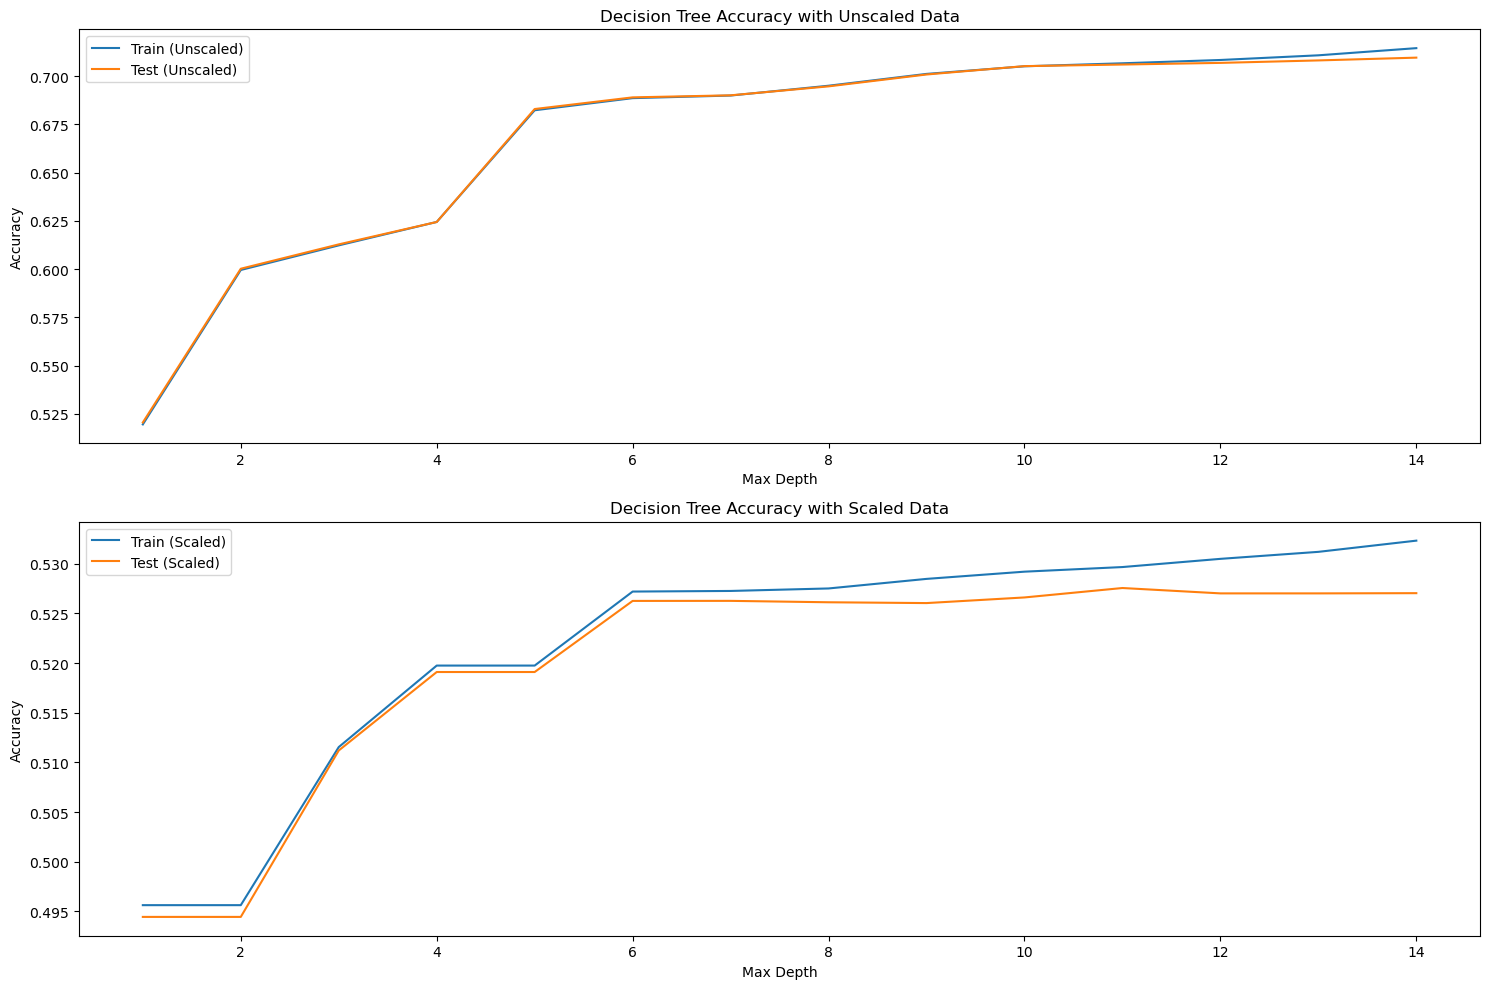

In [27]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train and X_test are already defined and contain both numerical and categorical data

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training set and transform both training and testing set for numerical features
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

# Since we cannot directly replace the scaled numerical data back into X_train and X_test (which may contain categorical data as well),
# let's reconstruct X_train_scaled and X_test_scaled with both scaled numerical data and original categorical data

# For simplicity, and to match your initial code, we'll only use scaled numerical data assuming that's your intent for the model training
X_train_scaled = X_train_scaled_numerical
X_test_scaled = X_test_scaled_numerical

# Now, let's proceed with the rest of your code for training and evaluating Decision Tree classifiers
# with both the unscaled and scaled datasets

# Initialize lists to store accuracies for unscaled data
train_accs = []
test_accs = []

# Initialize lists to store accuracies for scaled data
train_accs_s = []
test_accs_s = []

depth_values = list(range(1, 15))

# Loop over different max_depths for unscaled data
for d in depth_values:
    dt_unscaled = DecisionTreeClassifier(max_depth=d)
    dt_unscaled.fit(X_train, y_train)

    # Evaluate on train & test data (unscaled)
    train_accs.append(dt_unscaled.score(X_train, y_train))
    test_accs.append(dt_unscaled.score(X_test, y_test))

# Loop over different max_depths for scaled data
for d in depth_values:
    dt_scaled = DecisionTreeClassifier(max_depth=d)
    dt_scaled.fit(X_train_scaled, y_train)  # Using scaled data here

    # Evaluate on train & test data (scaled)
    train_accs_s.append(dt_scaled.score(X_train_scaled, y_train))
    test_accs_s.append(dt_scaled.score(X_test_scaled, y_test))

# Plotting
plt.figure(figsize=(15, 10))

# Plot for unscaled classifier results
plt.subplot(211)
plt.plot(depth_values, train_accs, label='Train (Unscaled)')
plt.plot(depth_values, test_accs, label='Test (Unscaled)')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy with Unscaled Data')

# Plot for scaled classifier results
plt.subplot(212)
plt.plot(depth_values, train_accs_s, label='Train (Scaled)')
plt.plot(depth_values, test_accs_s, label='Test (Scaled)')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy with Scaled Data')

plt.tight_layout()
plt.show()


In this case, the transformation could even obscure patterns in the case of poorly scaled features.

scaling might be unnecessary and might even slightly hinder the model

Let's try a regression model

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming df_model is your DataFrame
features = ['Year', 'Quarter', 'General_Region', 'Decisions', 'Age', 'Sex']
target = 'Case outcome'

X = df_model[features]
y = df_model[target]

# Define the preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Quarter', 'Decisions']),  # Numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['General_Region', 'Age', 'Sex'])  # Categorical features
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that includes the preprocessor and the DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.679768874435963
                        precision    recall  f1-score   support

           Asylum Case       0.52      0.40      0.45     12063
    Family Visa Issued       0.27      0.40      0.32     17164
                Issued       0.87      0.68      0.76      3978
               Refused       0.72      0.87      0.79      9509
Settlement Visa Issued       0.07      0.02      0.03      4792
   Sponsored Work Visa       0.71      0.79      0.74     54016
     Study Visa Issued       0.98      1.00      0.99     15018
 Temporary Visa Issued       0.79      0.73      0.76     58084
   Visitor Visa Issued       0.48      0.25      0.33      8653

              accuracy                           0.68    183277
             macro avg       0.60      0.57      0.57    183277
          weighted avg       0.68      0.68      0.67    183277



DecisionTreeClassifier is a great way to fine-tune your model by searching through a predefined grid of hyperparameters. This approach will help you identify the best combination of parameters for your model based on the specified scoring metric, which in this case is f1_weighted. This scoring metric is particularly useful for imbalanced classes because it weights the F1 score of each class by the number of true instances, then takes the average.

In [31]:
from sklearn.model_selection import GridSearchCV

# Assuming 'pipeline' is already defined as shown in your previous snippets
# and it includes a DecisionTreeClassifier named 'classifier' in its steps

param_grid = {
    'classifier__max_depth': [10, 20, 30, None],  # Max depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__class_weight': [None, 'balanced']  # Weights associated with classes. 'Balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
}

# Create a GridSearchCV object. Note: Depending on the version of scikit-learn, 'f1_weighted' might need to be changed to 'f1_weighted_average'
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found:", grid_search.best_params_)
print("Best F1 weighted score found:", grid_search.best_score_)


Best parameters found: {'classifier__class_weight': None, 'classifier__max_depth': 20, 'classifier__min_samples_split': 10}
Best F1 weighted score found: 0.6914662757384709


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from shutil import rmtree
import pandas as pd

# Assuming df_model and features are already defined
features = ['Year', 'Quarter', 'General_Region', 'Decisions', 'Age', 'Sex']
target = 'Case outcome'

X = df_model[features]
y = df_model[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numerical and categorical features
categorical_features = ['General_Region', 'Age', 'Sex']
numerical_features = ['Year', 'Quarter', 'Decisions']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a caching directory for pipeline memory
cachedir = mkdtemp()

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),  # Adjust or remove PCA based on your specific needs
    ('classifier', DecisionTreeClassifier(random_state=0))
], memory=cachedir)

# Parameter grid for RandomizedSearchCV
param_distributions = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__min_samples_split': [2, 10, 20]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    random_state=0,
    n_jobs=-1,
    verbose=3
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best parameters and scores
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Clean up the temporary cache directory
rmtree(cachedir)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\joblib\memory.py", line 594, in __call__
    return self._cached_call(args, kwargs)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\joblib\memory.py", line 537, in _cached_call
    out, metadata = self.call(*args, **kwargs)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\joblib\memory.py", line 779, in call
    output = self.func(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\base.py", line 881, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 824, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 861, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X = check_array(X, input_name="X", **check_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kamik\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Africa'


In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline.set_params(classifier=RandomForestClassifier(random_state=42))
